Importujemy potrzebne biblioteki

In [1]:
from qiskit import BasicAer, execute
from gates.su4gates import *
from util.util import *
import matplotlib.pyplot as plt
import numpy as np

Definiujemy potrzebne zmienne

In [2]:
qubits = 8
number_of_possibilities = 256
shots = 10000
number_of_bins = 100

Tworzymy obwód kwantowy z bramek Hadamarda oraz przeprowadzamy pomiary

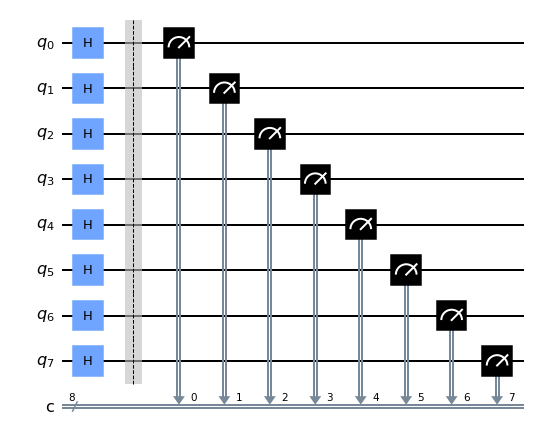

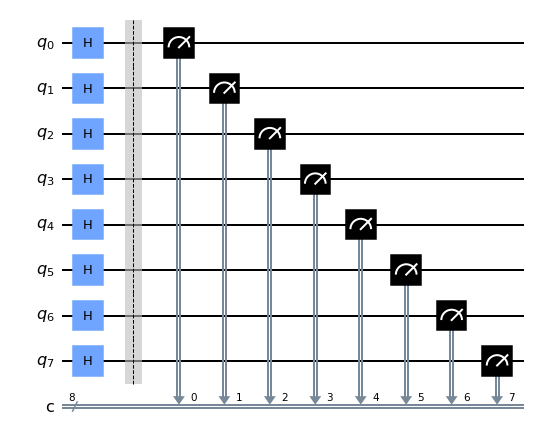

In [3]:
hadamard_circuit = QuantumCircuit(8, 8)
hadamard_circuit.h([0, 1, 2, 3, 4, 5, 6, 7])
hadamard_circuit.barrier()
hadamard_circuit.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
hadamard_circuit.draw(output='mpl')

Układ zostaje uruchomiony określoną liczbę razy. Następnie zliczane są wyniki każdego wykonania oraz obliczane jest prawdopodobieństwo każdego wyniku

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(hadamard_circuit, backend, shots=shots).result()
counts = result.get_counts()
counts = create_counts_all(counts, qubits)
probabilities_of_results = probabilities(counts, shots)
probabilities_of_results_values = list(probabilities_of_results.values())

Tworzymy histogram

Ilość wszystkich wygenerowanych kombinacji w 8-bitowym ciągu:  256


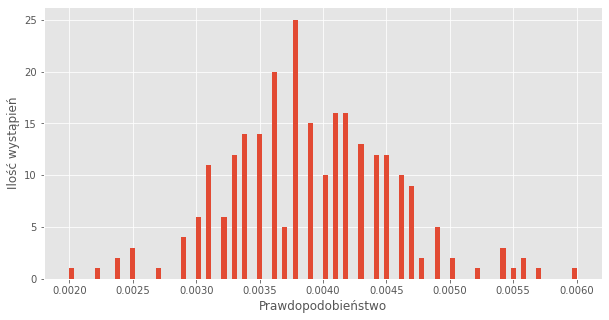

In [5]:
print("Ilość wszystkich wygenerowanych kombinacji w 8-bitowym ciągu: ", len(probabilities_of_results))

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.hist(probabilities_of_results_values, bins=number_of_bins)
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Ilość wystąpień")
plt.show()

Naniesienie na znormalizowany histogram teoretycznego rozkładu Portera-Thomasa

Chi-kwadrat:  296803.828616742
Entropia minimalna: 5.115995809754082


Text(0, 0.5, 'Gęstość prawdopodobieństwa')

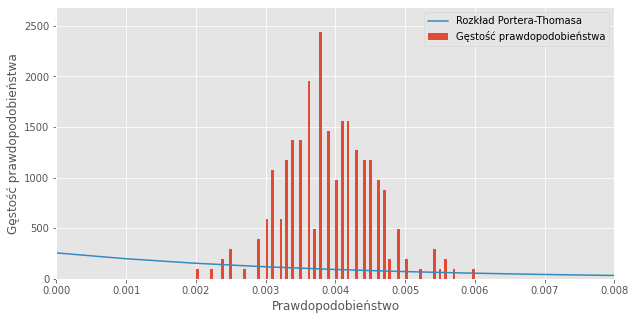

In [6]:
plt.figure(figsize=(10, 5))
probability_counter, bins, bar_in_histogram = plt.hist(probabilities_of_results_values, bins=number_of_bins)
bin_width = bins[1] - bins[0]
bin_heights = []

for item in bar_in_histogram:
    item.set_height(item.get_height() / (len(probabilities_of_results)) / bin_width)
    bin_heights.append(item.get_height())

middle_bins = middle_of_bins(bins)

chi = []
for i in range(0, 100):
    chi.append((bar_in_histogram[i].get_height() - porter_thomas_distribution(middle_bins[i],
                                                                              number_of_possibilities)) ** 2 / porter_thomas_distribution(
        middle_bins[i], number_of_possibilities))

print("Chi-kwadrat: ", sum(chi))
print("Entropia minimalna:", min_entropy(probabilities_of_results_values))

y = [number_of_possibilities * math.exp(-number_of_possibilities * p) for p in
     np.linspace(0, 1, len(probabilities_of_results_values) * 4)]
x = np.linspace(0, 1, len(y))
plt.xlim(0, 0.008)
plt.ylim(0, max(bin_heights) + (max(bin_heights) * 0.1))
plt.plot(x, y)
plt.legend(["Rozkład Portera-Thomasa", "Gęstość prawdopodobieństwa"])
plt.xlabel("Prawdopodobieństwo")
plt.ylabel("Gęstość prawdopodobieństwa")